# Soil Treatments

In [1]:
import os
import sys
sys.path.append("./src")
import h5py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from das_util import compute_misfit, get_tstamp
from scipy.ndimage import gaussian_filter1d, gaussian_filter
from scipy.interpolate import interp1d

matplotlib.rcParams.update({'font.size': 16})

data_dir='./data/'
fig_dir='./figures/'


spatial_data = os.path.join(data_dir, 'interp_dv_tillage_tire.csv')


freqmin=25
freqmax=50
samp_freq = 500
dchan = 3.19

In [2]:
## Index on the hour
hourly_index = [7,67,127,187,247,299,359,419,466,526,586,646,706,766,826,886,946,1003,1063,1123,
         1183,1243,1302,1362,1422,1482,1542,1599,1659,1719,1779,1839,1899,1959,2019,
         2078,2138,2198,2258,2318]
hourly_index = np.array(hourly_index)

# Data 

## Data 1 -- dV/V

In [3]:
with h5py.File(os.path.join(data_dir, 'final_peaks_deRatio_3iterations.h5'), 'r') as f:
    deratio_dvv = f['deratio_dvv'][:]

interp_f = interp1d(np.arange(0,2408,5), deratio_dvv, axis=-1, bounds_error=False, fill_value="extrapolate")
interp_dvv = interp_f(np.arange(2408))
amp = gaussian_filter1d(interp_dvv, sigma=4, axis=-1)  ## smooth time series

## Data 2 -- PSD for raining time

In [4]:
### PSD of high frequency DAS
with h5py.File(os.path.join(data_dir, 'integrated_psd.hdf5'), 'r') as f:
    int_PSD = f['int_PSD'][:]
    freq = f['freq'][:]
    file_list = f['file_list'][:]

## Mean PSD over channels
ave_psd=np.mean(int_PSD[0:44]/3, axis=0) + 0.0003

acqu_time = np.array([get_tstamp(i) for i in file_list.astype('U')])

Ind6hrs = [7, 359, 706, 1063, 1422, 1779, 2138]

xax=hourly_index[19:27]
tax=acqu_time[hourly_index[19:27]]
hrax=[dt.strftime('%H:%M') for dt in tax]

## Data 3 -- Tillage and Compaction from table

In [5]:
#### Use three-plot width as the spare the width
tillage = np.array([0,0,0,   10, 0, 25, 0, 10, 25, 25, 0, 10,    0,0,0,    25, 25, 0, 0, 0, 10, 10, 10, 25,    0,0,0,   10, 10, 0, 0, 10, 25, 0, 25, 25])
# tire = np.array([0,0,0,  7, 7, 12, 7, 12, 7, 7, 12, 7,    0,0,0,     12, 7, 7, 12, 7, 12, 7, 7, 7,    0,0,0,    12, 7, 7, 12, 7, 7, 7, 7, 12])
tire = np.array([0,0,0,  70, 70, 100, 70, 100, 70, 70, 100, 70,    0,0,0,     100, 70, 70, 100, 70, 100, 70, 70, 70,    0,0,0,    100, 70, 70, 100, 70, 70, 70, 70, 100])
randomness = np.array([-1,-1,-1, 1, 2, 2, 0, 2, 0, 2, 2, 0, -1,-1,-1, 2, 0, 2, 2, 0, 2, 2, 0, 2, -1,-1,-1, 2, 0, 2, 2, 2, 0, 0, 2, 2])

#### Interpolate tillage and tire pressure
f = interp1d(np.arange(36)*4-3, tillage, bounds_error=False, fill_value=1)
intep_tillage = f(np.arange(50-6)*dchan)

f = interp1d(np.arange(36)*4-3, tire, bounds_error=False, fill_value=1)
intep_tire = f(np.arange(50-6)*dchan)

smooth_tillage = gaussian_filter1d(intep_tillage[:], sigma=2.5)
smooth_tire = gaussian_filter1d(intep_tire[:], sigma=2.5)

In [6]:
### Reverse interpolation: interpolate the dV/V data to plots
f = interp1d(np.arange(50-6)*dchan, variability_evap*100, bounds_error=False, fill_value=1)
interp_ddvv = f(np.arange(36)*4-3)

f = interp1d(np.arange(50-6)*dchan, damage_index*100, bounds_error=False, fill_value=1)
interp_disturb = f(np.arange(36)*4-3)

### plot
plt.figure(figsize=(15, 3))
plt.plot(np.arange(36)*4+20, interp_ddvv, label='variability', lw=4, color='#6C757D')
plt.plot(np.arange(36)*4+20, tillage*2, label='tillage', lw=4, color='Coral')
plt.plot(np.arange(36)*4+20, tire/2, label='tire', lw=4, color='Cyan')
plt.plot(np.arange(36)*4+20, interp_disturb/2, label='disturbance', lw=4, color='green')


NameError: name 'variability_evap' is not defined

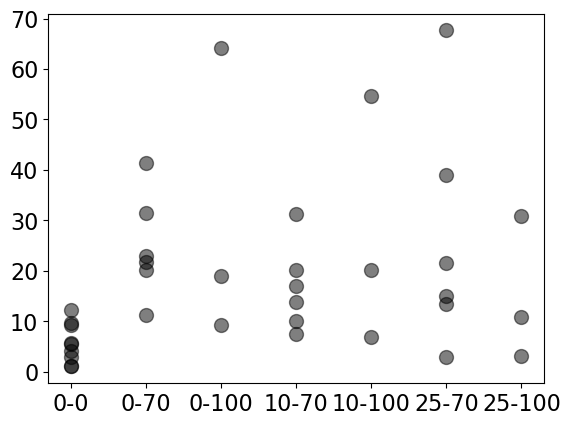

In [ ]:
### plot categorical ddVV
plt.figure()

for i in range(36):
    ddvv = interp_ddvv[i]
    
    if tire[i]==0:
        x_value = 0
    elif tillage[i]==0 and tire[i]==70:
        x_value = 1
    elif tillage[i]==0 and tire[i]==100:
        x_value = 2
    elif tillage[i]==10 and tire[i]==70:
        x_value = 3
    elif tillage[i]==10 and tire[i]==100:
        x_value = 4
    elif tillage[i]==25 and tire[i]==70:
        x_value = 5
    elif tillage[i]==25 and tire[i]==100:
        x_value = 6
    
    plt.scatter(x_value, ddvv, color='black', s=100, alpha=0.5)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['0-0', '0-70', '0-100', '10-70', '10-100', '25-70', '25-100'])
# plt.yscale('log')
# plt.ylabel('ddVV (log scale)')
plt.show()

In [7]:
### plot categorical ddVV
plt.figure()

for i in range(36):
    ddvv = interp_ddvv[i]
    
    if tire[i]==0:
        x_value = 0
    elif tire[i]==70:
        x_value = 1
    elif tire[i]==100:
        x_value = 2

    
    plt.scatter(x_value, ddvv, color='black', s=100, alpha=0.5)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['0-0', '0-70', '0-100', '10-70', '10-100', '25-70', '25-100'])
plt.yscale('log')
plt.ylabel('ddVV (log scale)')
plt.show()

NameError: name 'interp_ddvv' is not defined

<Figure size 640x480 with 0 Axes>

## Data 4 -- Attenuation
Q from strected twice

In [6]:
with h5py.File(os.path.join(data_dir, 'Result_intb_15-60Hz_stretched_twice.h5'), 'r') as f:
    raw_intb = f['raw_intb'][:]
    demean_intb = f['demean_intb'][:]
    abs_intb = f['absintb'][:]
    mean_acf_intb=f['mean_acf_intb'][:]

trim_inb = raw_intb[:, 221:300]
variability = np.fabs(np.nanmean(trim_inb[:, :30], axis=1) - np.nanmean(trim_inb[:, -30:], axis=1))

# Visualize dV/V

[Text(0, 0, '17 17:53'),
 Text(360, 0, '18 00:01'),
 Text(720, 0, '18 06:14'),
 Text(1080, 0, '18 12:17'),
 Text(1440, 0, '18 18:18'),
 Text(1800, 0, '19 00:21'),
 Text(2160, 0, '19 06:22')]

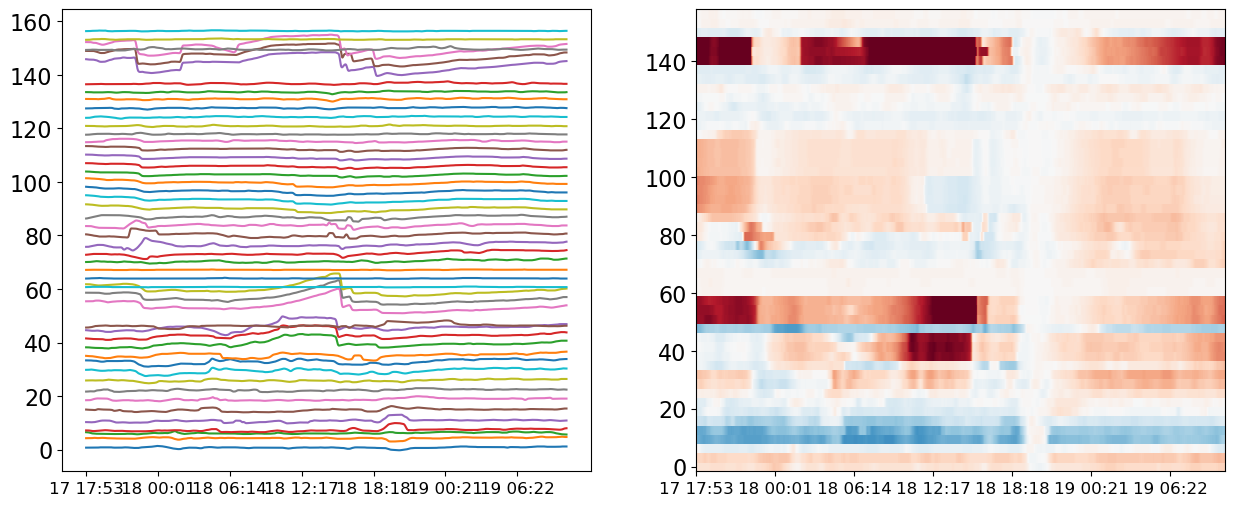

In [7]:
smooth1d_dvv = amp
fig, ax = plt.subplots(1,2, figsize=(15, 6))
for i in range(50):
    ax[0].plot(np.arange(2408), 10*smooth1d_dvv[i]+i*3.19, label=f'channel {i}')

ax[1].pcolor(np.arange(2408), np.arange(50)*3.19, smooth1d_dvv, shading='auto', vmin=-0.5, vmax=0.5, cmap = 'RdBu_r')

xax=np.arange(0, ave_psd.shape[-1], 360)
tax=acqu_time[:ave_psd.shape[-1]:360]
hrax=[dt.strftime('%d %H:%M') for dt in tax]

ax[0].set_xticks(xax)
ax[0].set_xticklabels(hrax, fontsize = 12)
ax[1].set_xticks(xax)
ax[1].set_xticklabels(hrax, fontsize = 12)

# Sort channels using various matrics

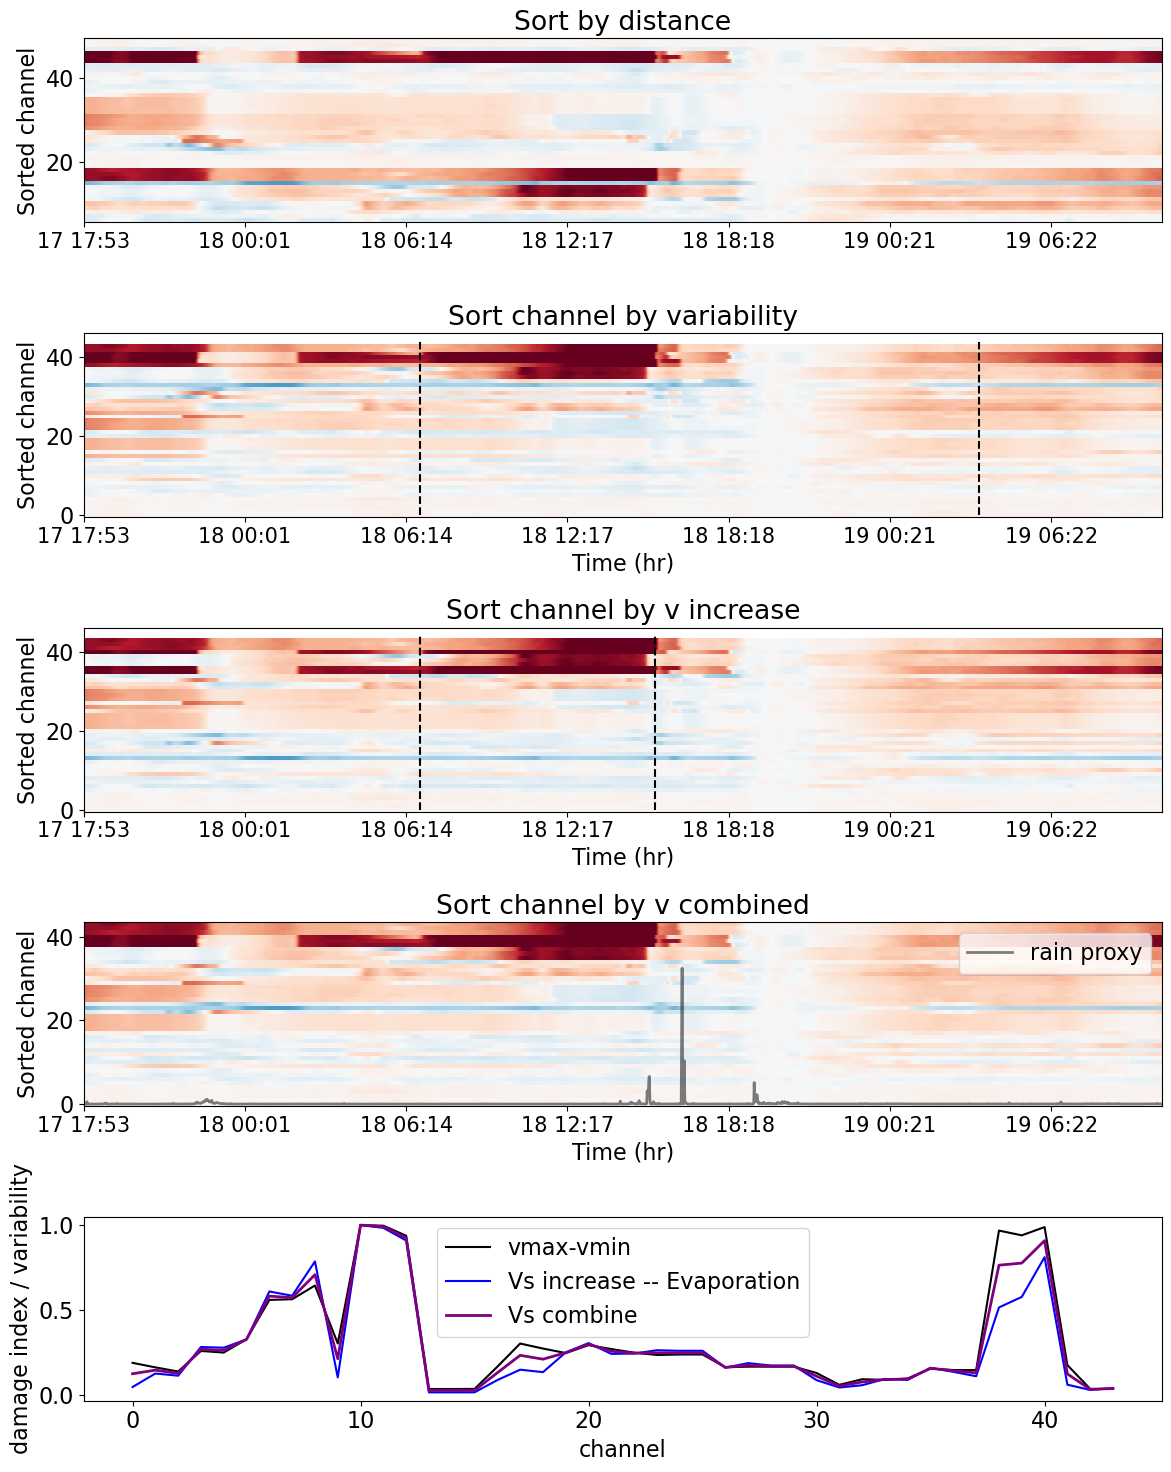

In [8]:
dvv_all = amp

fig, axs = plt.subplots(5, 1, figsize=(12, 15), tight_layout=True)

# Plot 1: Sort channel by mechanical damage
axs[0].pcolormesh(np.arange(2408), np.arange(44)+6, dvv_all[6:], shading='auto', vmin=-0.5, vmax=0.5, cmap='RdBu_r')
axs[0].set_title('Sort by distance')
axs[0].set_xticks(xax)
axs[0].set_xticklabels(hrax, fontsize=15)
axs[0].set_ylabel('Sorted channel')

# Plot 2: Sort channel by variability
trim_dvv = dvv_all[6:51, 750:2000]
variability_all = np.nanmax(trim_dvv, axis=1) - np.nanmin(trim_dvv, axis=1)
axs[4].plot(variability_all/np.nanmax(variability_all), color='black', label='vmax-vmin')
variability_indices = np.argsort(variability_all) + 6

axs[1].pcolormesh(np.arange(2408), np.arange(44), dvv_all[variability_indices], shading='auto', vmin=-0.5, vmax=0.5, cmap='RdBu_r')
axs[1].set_title('Sort channel by variability')
axs[1].set_xticks(xax)
axs[1].set_xticklabels(hrax, fontsize=15)
axs[1].set_xlabel('Time (hr)')
axs[1].set_ylabel('Sorted channel')
axs[1].vlines([750, 2000], 0, 44, color='k', linestyle='--')


# Plot 3: Sort channel by v increase
trim_dvv = dvv_all[6:51, 750:1275]
variability_evap = np.nanmax(trim_dvv, axis=1) - np.nanmin(trim_dvv, axis=1)
axs[4].plot(variability_evap/np.nanmax(variability_evap), color='blue', label='Vs increase -- Evaporation')
variability_indices = np.argsort(variability_evap) + 6

axs[2].pcolormesh(np.arange(2408), np.arange(44), dvv_all[variability_indices], shading='auto', vmin=-0.5, vmax=0.5, cmap='RdBu_r')
axs[2].set_title('Sort channel by v increase')
axs[2].set_xticks(xax)
axs[2].set_xticklabels(hrax, fontsize=15)
axs[2].set_xlabel('Time (hr)')
axs[2].set_ylabel('Sorted channel')
axs[2].vlines([750, 1275], 0, 44, color='k', linestyle='--')


# # Plot 4: Sort channel by v drop
# trim_dvv = dvv_all[6:51, 1105:1490]
# variability = np.fabs(np.nanmean(trim_dvv[:, :150], axis=1) - np.nanmean(trim_dvv[:, -150:], axis=1))
# axs[4].plot(variability/np.nanmax(variability), color='purple', label='Vs drop -- Precipitation', lw=2)
# variability_indices = np.argsort(variability) + 6

# im=axs[3].pcolormesh(np.arange(2408), np.arange(45), dvv_all[variability_indices], shading='auto', vmin=-0.4, vmax=0.6, cmap='RdBu_r')
# axs[3].set_title('Sort channel by v drop')
# axs[3].set_xticks(xax)
# axs[3].set_xticklabels(hrax, fontsize=15)
# axs[3].set_xlabel('Time (hr)')
# axs[3].set_ylabel('Sorted channel')
# axs[3].vlines([1105, 1255, 1340, 1490], 0, 44, color='k', linestyle='--')
# axs[3].plot(ave_psd * 50, color='k', lw=2, alpha=0.5, label='rain proxy')
# axs[3].legend()

# Plot 4: Sort channel by 2+3

variability = variability_all + variability_evap
axs[4].plot(variability/np.nanmax(variability), color='purple', label='Vs combine', lw=2)
variability_indices = np.argsort(variability) + 6

im=axs[3].pcolormesh(np.arange(2408), np.arange(44), dvv_all[variability_indices], shading='auto', vmin=-0.5, vmax=0.5, cmap='RdBu_r')
axs[3].set_title('Sort channel by v combined')
axs[3].set_xticks(xax)
axs[3].set_xticklabels(hrax, fontsize=15)
axs[3].set_xlabel('Time (hr)')
axs[3].set_ylabel('Sorted channel')
axs[3].plot(ave_psd * 50, color='k', lw=2, alpha=0.5, label='rain proxy')
axs[3].legend()

# Plot 5: all spatial variabilities and damage index
axs[4].set_ylabel('damage index / variability')
axs[4].set_xlabel('channel')
axs[4].legend()

# Grid search to explore the importance of Tilling and Compaction

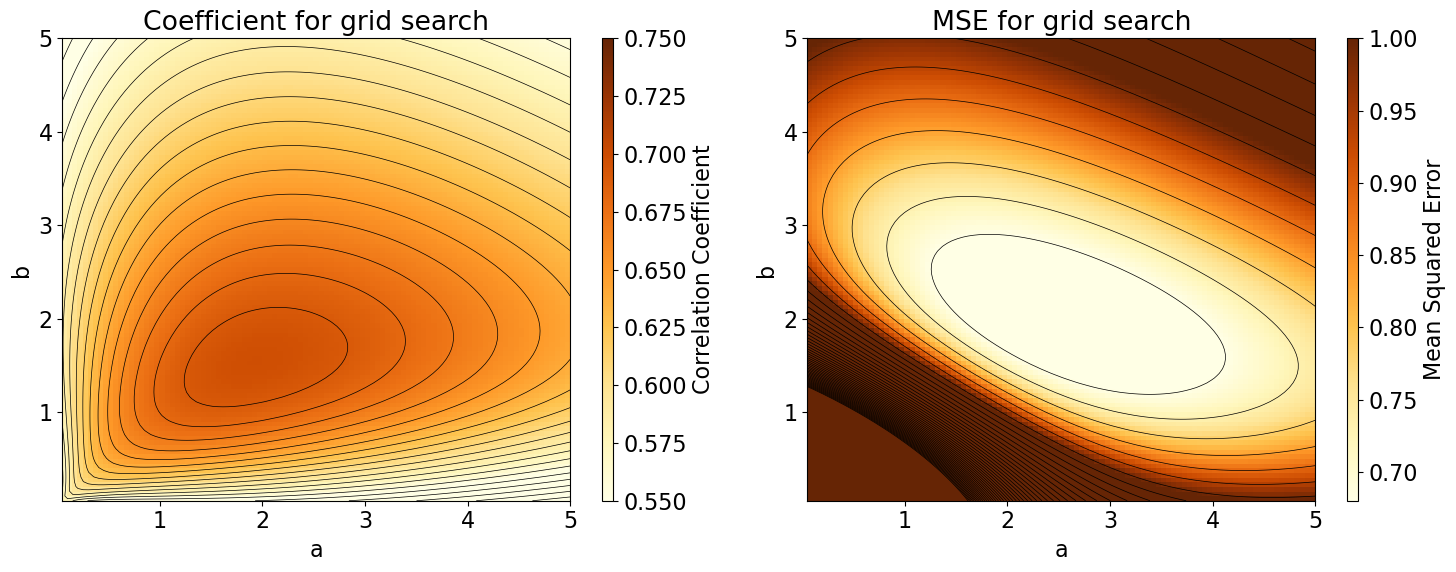

Largest correlation coefficient: 0.6977107372131398
Best a: 1.5
Best b: 1.9000000000000001
Smallest mean squared error: 0.6206658696318464
Best a: 1.9500000000000002
Best b: 2.5


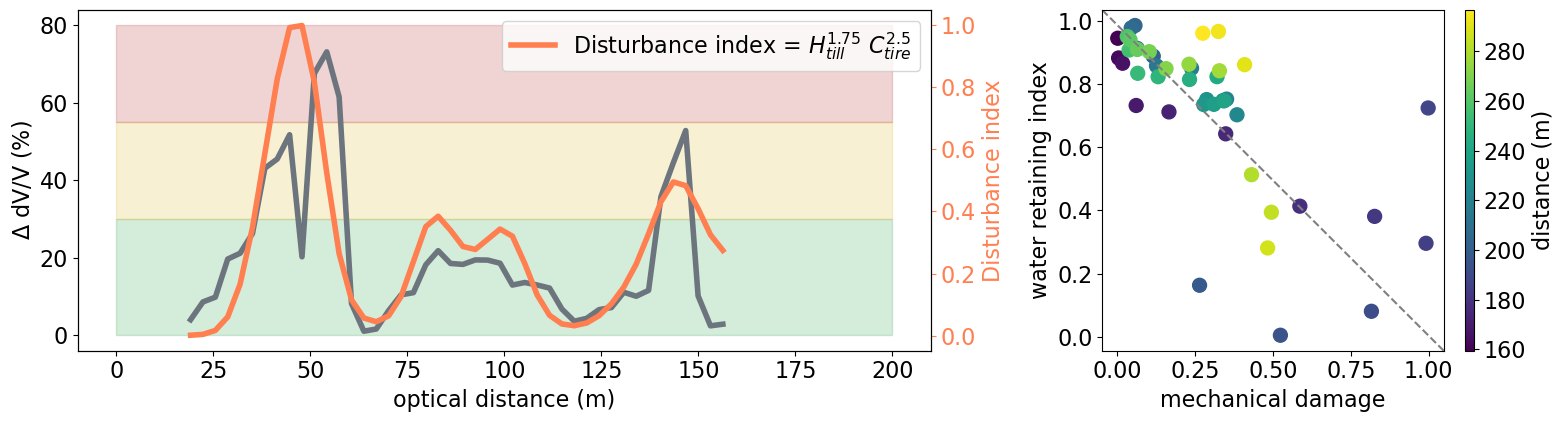

cross-corr: 0.6913482922627859
mse: 0.6206658696318464


In [10]:
### Read the data from the interpolated file
# tillage_interpolated = pd.read_csv(spatial_data)['tillage_depth'].to_numpy()
# tire_interpolated = pd.read_csv(spatial_data)['tire_pressure'].to_numpy()
# dvv_variability = pd.read_csv(spatial_data)['dvv_varibility'].to_numpy()

tillage_interpolated = smooth_tillage
tire_interpolated = smooth_tire
dvv_variability = gaussian_filter1d(variability_evap, sigma=0.5)

### define a loop for gridsearch
# Create a grid of a and b values
a_values = np.arange(0.05, 5, 0.05)
b_values = np.arange(0.05, 5, 0.05)
correlation_matrix = np.zeros((len(a_values), len(b_values)))
mse_matrix = np.zeros((len(a_values), len(b_values)))

# Compute the correlation for each combination of a and b
for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        correlation, mse, _, _ = compute_misfit(a, b, tillage_interpolated, tire_interpolated, dvv_variability)
        correlation_matrix[i, j] = correlation
        mse_matrix[i, j] = mse
        

# Plot the correlation matrix and MSE matrix as subfigures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)

# Correlation matrix
# Correlation matrix with contours
cax1 = ax1.imshow(correlation_matrix, extent=[0.05, 5, 0.05, 5], origin='lower', aspect='auto', cmap='YlOrBr', vmin=0.55, vmax=0.75)
contour1 = ax1.contour(correlation_matrix, levels=np.arange(0.5,0.75,0.01), colors='black', extent=[0.05, 5, 0.05, 5], linewidths=0.5)
fig.colorbar(cax1, ax=ax1, label='Correlation Coefficient', aspect=40)
ax1.set_xlabel('a')
ax1.set_ylabel('b')
ax1.set_title('Coefficient for grid search')

# MSE matrix with contours
cax2 = ax2.imshow(mse_matrix, extent=[0.05, 5, 0.05, 5], origin='lower', aspect='auto', cmap='YlOrBr', vmin=0.68, vmax=1)
contour2 = ax2.contour(mse_matrix, levels=np.arange(0.68,3,0.05), colors='black', extent=[0.05, 5, 0.05, 5], linewidths=0.5)
fig.colorbar(cax2, ax=ax2, label='Mean Squared Error', aspect=40)
ax2.set_xlabel('a')
ax2.set_ylabel('b')
ax2.set_title('MSE for grid search')

plt.show()

# Find the indices of the maximum correlation coefficient
max_corr_index = np.unravel_index(np.argmax(correlation_matrix, axis=None), correlation_matrix.shape)
max_corr = correlation_matrix[max_corr_index]
best_a = a_values[max_corr_index[0]]
best_b = b_values[max_corr_index[1]]

print(f"Largest correlation coefficient: {max_corr}")
print(f"Best a: {best_a}")
print(f"Best b: {best_b}")

mse_index = np.unravel_index(np.argmin(mse_matrix, axis=None), mse_matrix.shape)
min_mse = mse_matrix[mse_index]
best_a_mse = a_values[mse_index[0]]
best_b_mse = b_values[mse_index[1]]

print(f"Smallest mean squared error: {min_mse}")
print(f"Best a: {best_a_mse}")
print(f"Best b: {best_b_mse}")

### plot the spatial variability
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4.5), gridspec_kw={'width_ratios': [2, 1]}, tight_layout=True)

# Plot scaled variability and mechanical damage
ax1.fill_between([0,200], [0,0], [30,30], color='#28A046', alpha=0.2)
ax1.fill_between([0,200], [30,30], [55,55], color='#DCB41E', alpha=0.2)
ax1.fill_between([0,200], [55,55], [80,80], color='#B42828', alpha=0.2)
ax1.plot((np.arange(len(dvv_variability))+6)*3.19, dvv_variability*100, label='variability', lw=4, color='#6C757D')
# ax1.plot((np.arange(45)+50)*3.19, gaussian_filter1d(dvv_variability, sigma=2), label='smoothed variability', lw=6, color='k', linestyle='--')
ax1.set_xlabel("optical distance (m)", fontsize=16)
ax1.set_ylabel("$\Delta$ dV/V (%)", fontsize=16)
twinx = ax1.twinx()

# correlation, mse, scaled_mechanical, scaled_variability = compute_misfit(best_a, best_b, tillage_interpolated, tire_interpolated, dvv_variability)    
# twinx.plot((np.arange(len(dvv_variability))+6)*3.19, scaled_mechanical/4, label='$D_{tillage}^{1.6}~P_{tire}^{0.1.6}$', lw=3, color='red', alpha=0.2)
correlation, mse, scaled_mechanical, scaled_variability = compute_misfit(best_a_mse, best_b_mse, tillage_interpolated, tire_interpolated, dvv_variability)  
# twinx.plot((np.arange(len(dvv_variability))+6)*3.19, scaled_mechanical/4, label='$H_{till}^{1.75}~C_{tire}^{2.5}$', lw=4, color='Coral')  
twinx.plot((np.arange(len(dvv_variability))+6)*3.19, scaled_mechanical/4, label='Disturbance index = $H_{till}^{1.75}~C_{tire}^{2.5}$', lw=4, color='Coral')  

# twinx.plot((np.arange(45)+50)*3.19, tire_interpolated, label='$D_{tillage}^{1.6}~P_{tire}^{1.6}$', lw=3, color='k')  
# twinx.plot((np.arange(45)+50)*3.19, tillage_interpolated * tire_interpolated/10, lw=3, color='purple')  
twinx.set_ylabel("Disturbance index", fontsize=16, color='Coral')
twinx.tick_params(axis='y', colors='Coral')
twinx.legend(loc='upper right')

# Covariance plot
damage_index = scaled_mechanical/4
ax2.plot([0, 1], [1, 0], transform=ax2.transAxes, color='gray', linestyle='--')
cax = ax2.scatter(damage_index, 1 - scaled_variability/4, s=100,  cmap='viridis', c=(np.arange(len(dvv_variability))+50)*3.19)
ax2.set_ylabel("water retaining index", fontsize=16)
ax2.set_xlabel("mechanical damage", fontsize=16)
fig.colorbar(cax, ax=ax2, label='distance (m)', aspect=40)


plt.show()

print(f"cross-corr: {correlation}")
print(f"mse: {mse}")

In [17]:
dyn_type = np.where(dvv_variability > 0.55, 0, np.where(dvv_variability > 0.30, 1, 2))

## Save the damage index
interp_paras = pd.DataFrame(data={'dvv_variability': variability_all,
                                  'dvv_variability_evap': variability_evap,
                                  'disturbance_index': damage_index,
                                  'tillage_depth': intep_tillage,
                                  'tire_pressure': intep_tire,
                                  'dyn_type': dyn_type})

interp_paras.to_csv(os.path.join(data_dir, 'damage_index.csv'))

## FIGURE 3

Text(0.78, 0.45, '(e)')

/Users/shiqibin/miniconda3/envs/quakeflow/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/shiqibin/miniconda3/envs/quakeflow/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


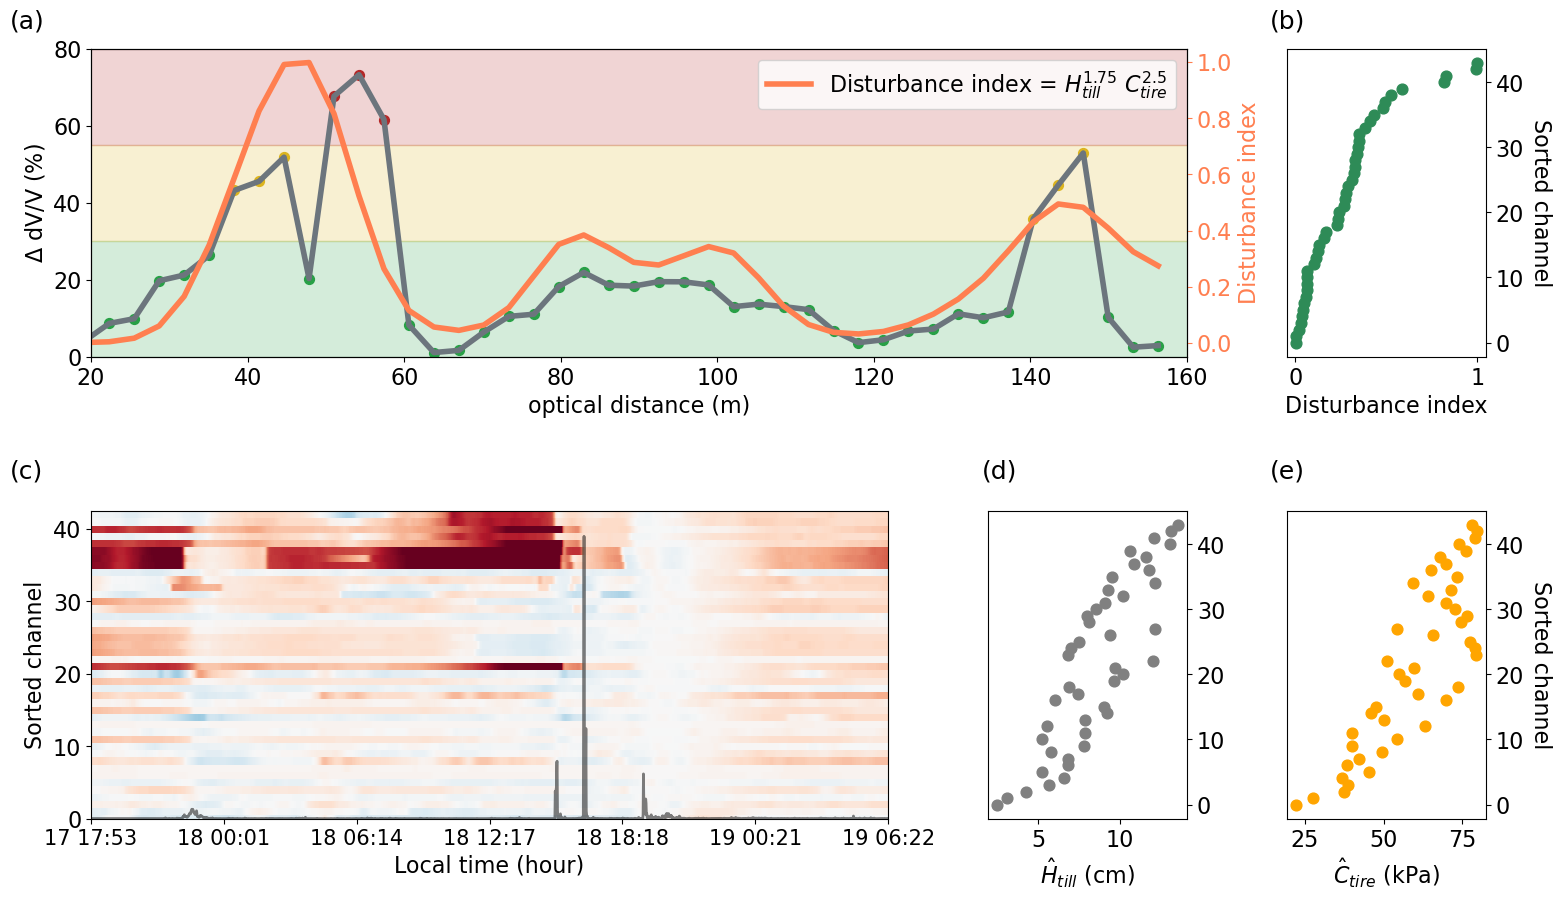

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 10), tight_layout=True)
gs = gridspec.GridSpec(2, 5, figure=fig, wspace=0.5, hspace=0.5)
ax1 = fig.add_subplot(gs[0, 0:4]) 
ax2 = fig.add_subplot(gs[0, 4]) 
ax3 = fig.add_subplot(gs[1, 0:3])
ax4 = fig.add_subplot(gs[1, 3])
ax5 = fig.add_subplot(gs[1, 4])

tillage_interpolated = smooth_tillage
tire_interpolated = smooth_tire
correlation, mse, scaled_mechanical, scaled_variability = compute_misfit(best_a_mse, best_b_mse, tillage_interpolated, tire_interpolated, dvv_variability) 
disturbance_index = scaled_mechanical/4

### (a) Vs variability and Disturbance Index
ax1.fill_between([0,200], [0,0], [30,30], color='#28A046', alpha=0.2)
ax1.fill_between([0,200], [30,30], [55,55], color='#DCB41E', alpha=0.2)
ax1.fill_between([0,200], [55,55], [80,80], color='#B42828', alpha=0.2)
ax1.plot((np.arange(len(dvv_variability))+6)*3.19, dvv_variability*100, label='variability', lw=4, color='#6C757D')

for i, dyn in enumerate(dyn_type):
    if dyn == 2:
        ax1.scatter((i + 6) * 3.19, dvv_variability[i] * 100, color='#28A046', s=50, label='Type 2' if i == 0 else None)
    elif dyn == 1:
        ax1.scatter((i + 6) * 3.19, dvv_variability[i] * 100, color='#DCB41E', s=50, label='Type 1' if i == 0 else None)
    elif dyn == 0:
        ax1.scatter((i + 6) * 3.19, dvv_variability[i] * 100, color='#B42828', s=50, label='Type 0' if i == 0 else None)

ax1.set_xlabel("optical distance (m)", fontsize=16)
ax1.set_ylabel("$\Delta$ dV/V (%)", fontsize=16)
ax1.set_xlim(20, 160)
ax1.set_ylim(0, 80)

twinx = ax1.twinx() 
twinx.plot((np.arange(len(dvv_variability))+6)*3.19, disturbance_index, label='Disturbance index = $H_{till}^{1.75}~C_{tire}^{2.5}$', lw=4, color='Coral')  
twinx.set_ylabel("Disturbance index", fontsize=16, color='Coral')
twinx.tick_params(axis='y', colors='Coral')
twinx.legend(loc='upper right')

### (b) Disturbance Index to sort channels
trim_dvv_smooth1d = amp[6:50, 1105:1500]
variability1 = np.fabs(np.nanmean(trim_dvv_smooth1d[:, :150], axis=1) - np.nanmean(trim_dvv_smooth1d[:, -150:], axis=1))
variability_indices1 = np.argsort(disturbance_index) + 6

ax2.scatter(disturbance_index[variability_indices1-6], np.arange(44), s=60, color='seagreen')
ax2.set_xlabel('Disturbance index')
ax2.set_ylabel('Sorted channel', labelpad=20, rotation=270, verticalalignment='center')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

### (c) DI sorted dvv
ave_psd[1190:1258] = 0 
ave_psd[:200] = 0 
im = ax3.pcolor(np.arange(2408), np.arange(44), amp[variability_indices1], shading='auto', vmin=-0.6, vmax=0.6, cmap='RdBu_r')
ax3.plot(ave_psd * 60, color='k', lw=2, alpha=0.5, label='rain proxy')
ax3.set_xlabel('Local time (hour)')
ax3.set_ylabel('Sorted channel')
ax3.set_xlim([1105,1500])
ax3.set_ylim(0, 42.5)
ax3.set_xticks(xax)
ax3.set_xticklabels(hrax, fontsize=15)

### (c) DI sorted tillage
ax4.scatter(tillage_interpolated[variability_indices1-6], np.arange(44), s=60, color='gray')
ax4.set_xlabel('$\hat{H}_{till}$ (cm)')
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()

### (d) DI sorted tire pressure
ax5.scatter(tire_interpolated[variability_indices1-6], np.arange(44), s=60, color='orange')
ax5.set_xlabel('$\hat{C}_{tire}$ (kPa)')
ax5.set_ylabel('Sorted channel', labelpad=20, rotation=270, verticalalignment='center')
ax5.yaxis.set_label_position("right")
ax5.yaxis.tick_right()

fig.text(0.08, 0.9, '(a)', fontsize=18)
fig.text(0.78, 0.9, '(b)', fontsize=18)
fig.text(0.08, 0.45, '(c)', fontsize=18)
fig.text(0.62, 0.45, '(d)', fontsize=18)
fig.text(0.78, 0.45, '(e)', fontsize=18)

# Compare D and b

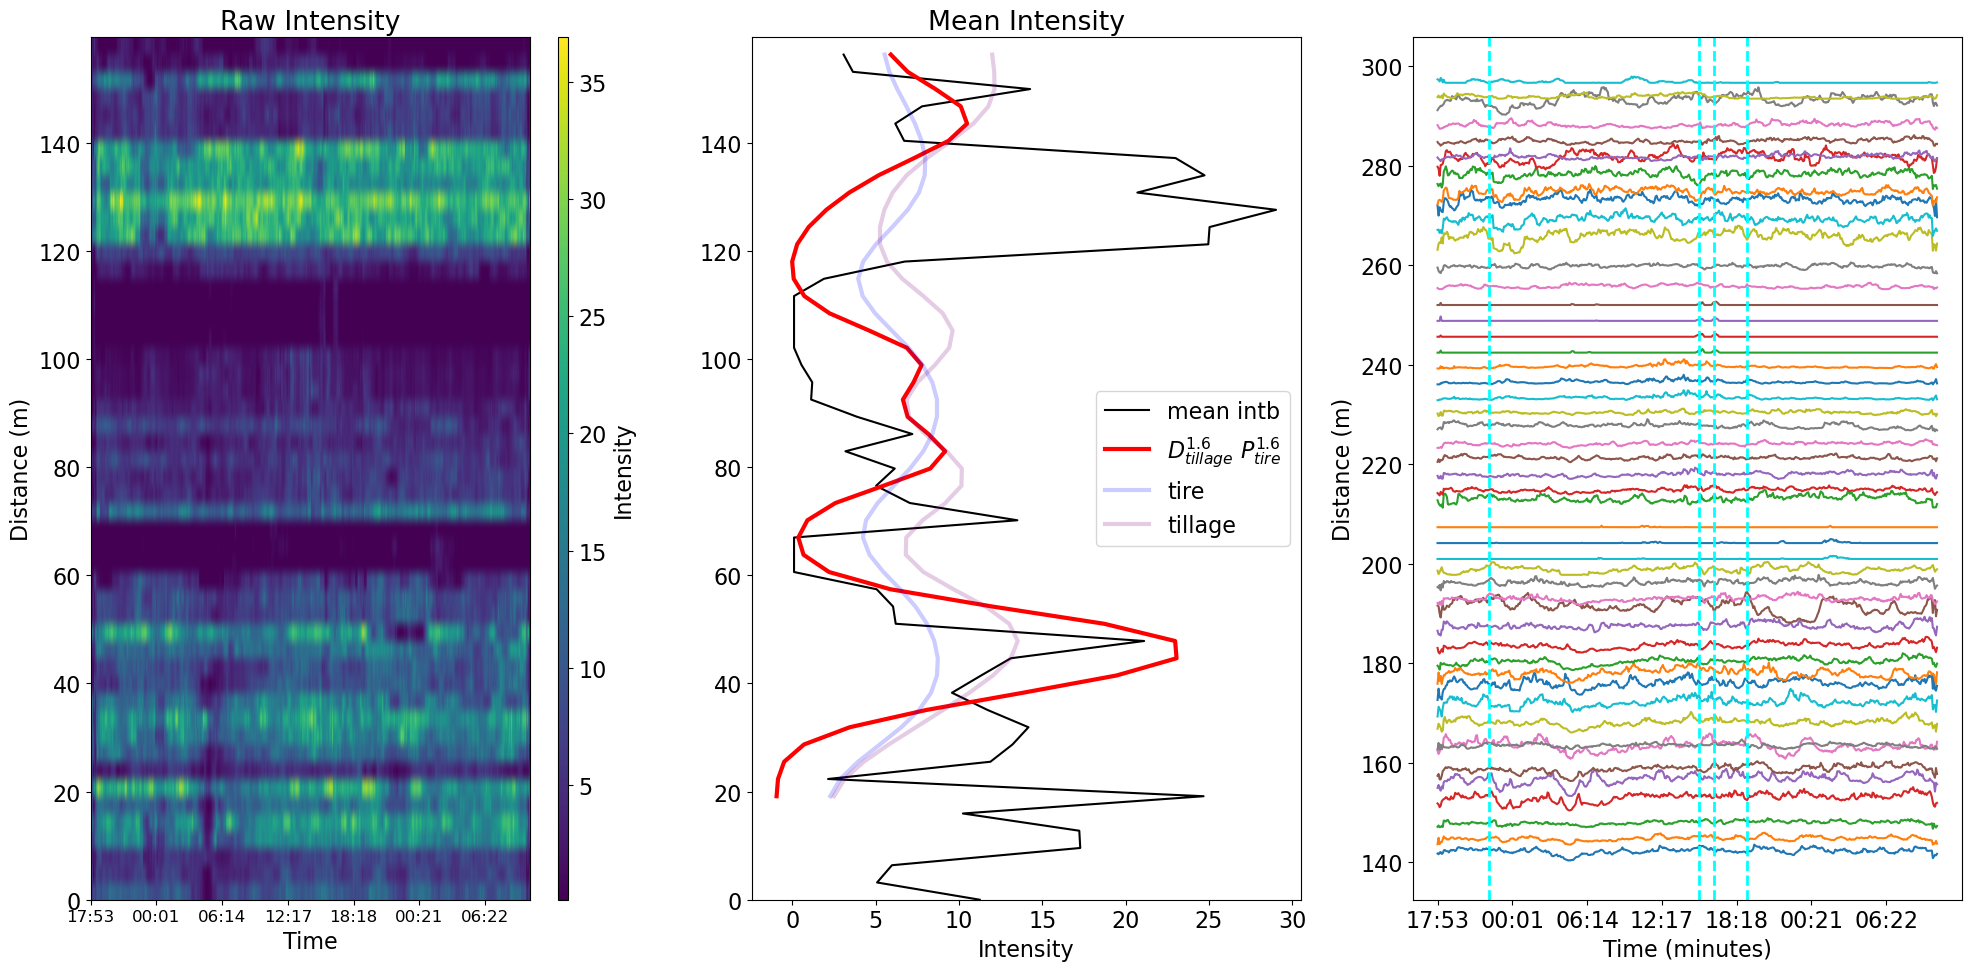

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

# Plot raw_intb
cax1 = ax1.imshow(raw_intb[:, :, 0], aspect='auto', cmap='viridis', origin='lower', extent=[0, 2408, 0, 50*3.19])
ax1.set_title('Raw Intensity')
ax1.set_xlabel('Time')
ax1.set_ylabel('Distance (m)')
ax1.set_xticks(xax)
ax1.set_xticklabels([t.strftime('%H:%M') for t in tax], fontsize=12)
fig.colorbar(cax1, ax=ax1, orientation='vertical', label='Intensity', aspect=80)

# Plot demean_intb
# ax2.plot(mean_acf_intb, np.arange(50)*3.19, label='mean acf intb', color='k')
# ax2.plot(variability, np.arange(50)*3.19, label='intb_variability', color='green')
ax2.plot(np.mean(raw_intb[:, 30:42, 0], axis=1), np.arange(50)*3.19, color='k', label='mean intb')
# ax2.plot(abs_intb, np.arange(50)*3.19, label='intb_variability', color='green')
ax2.plot(scaled_mechanical*6-1, np.arange(6, 50)*3.19, label='$D_{tillage}^{1.6}~P_{tire}^{1.6}$', lw=3, color='red')  
ax2.plot(smooth_tire, np.arange(6, 50)*3.19, label='tire', lw=3, color='blue', alpha=0.2)
ax2.plot(smooth_tillage, np.arange(6, 50)*3.19, label='tillage', lw=3, color='purple', alpha=0.2)
ax2.legend()

ax2.set_title('Mean Intensity')
ax2.set_xlabel('Intensity')
ax2.set_ylim([0, 50*3.19])

for i in range(50):
    ax3.plot(np.arange(482)*5, raw_intb[i, :, 0]/5+(i+44)*3.19)
ax3.axvline(x=250,  color='cyan', linestyle='--', lw=2)
ax3.axvline(x=1260,  color='cyan', linestyle='--', lw=2)
ax3.axvline(x=1330,  color='cyan', linestyle='--', lw=2)
ax3.axvline(x=1490,  color='cyan', linestyle='--', lw=2)
ax3.set_xlabel('Time (minutes)')
ax3.set_ylabel('Distance (m)')
ax3.set_xticks(xax)
ax3.set_xticklabels([t.strftime('%H:%M') for t in tax], fontsize=16)

plt.tight_layout()